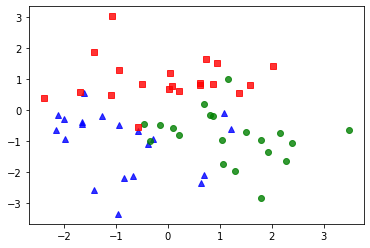

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1,0], [0,1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis= 0)
K = 3

original_label = np.asarray([0]*N+[1]*N+[2]*N)

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 6, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 6, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 6, alpha = .8)
    
    plt.plot()

kmeans_display(X, original_label)
plt.show()
y = original_label.T
X = X.T

    

iter 0, loss: 1.098526
iter 1000, loss: 0.234532
iter 2000, loss: 0.178638
iter 3000, loss: 0.148468
iter 4000, loss: 0.115310
iter 5000, loss: 0.095237
iter 6000, loss: 0.099336
iter 7000, loss: 0.074457
iter 8000, loss: 0.067052
iter 9000, loss: 0.064251
training accuracy: 96.67 %
(1, 89600)


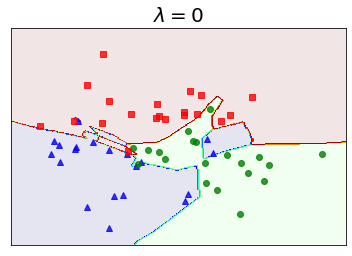

iter 0, loss: 1.099046
iter 1000, loss: 0.375881
iter 2000, loss: 0.365744
iter 3000, loss: 0.373560
iter 4000, loss: 0.368289
iter 5000, loss: 0.351413
iter 6000, loss: 0.351886
iter 7000, loss: 0.329827
iter 8000, loss: 0.324618
iter 9000, loss: 0.361696
training accuracy: 91.67 %
(1, 89600)


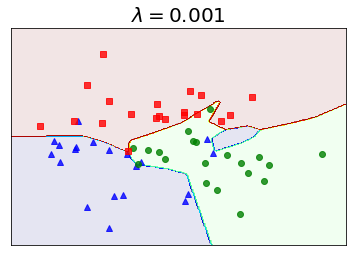

iter 0, loss: 1.099620
iter 1000, loss: 0.506137
iter 2000, loss: 0.505722
iter 3000, loss: 0.505446
iter 4000, loss: 0.505304
iter 5000, loss: 0.505220
iter 6000, loss: 0.505072
iter 7000, loss: 0.505201
iter 8000, loss: 0.505110
iter 9000, loss: 0.504945
training accuracy: 88.33 %
(1, 89600)


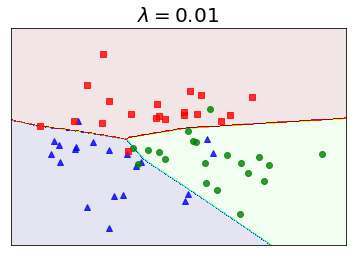

iter 0, loss: 1.103531
iter 1000, loss: 0.972122
iter 2000, loss: 0.973298
iter 3000, loss: 0.976479
iter 4000, loss: 0.970987
iter 5000, loss: 0.977668
iter 6000, loss: 0.969306
iter 7000, loss: 0.978525
iter 8000, loss: 0.976526
iter 9000, loss: 0.974921
training accuracy: 83.33 %
(1, 89600)


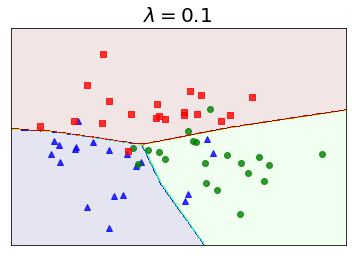

iter 0, loss: 1.152792
iter 1000, loss: 1.098612
iter 2000, loss: 1.098612
iter 3000, loss: 1.098612
iter 4000, loss: 1.098612
iter 5000, loss: 1.098612
iter 6000, loss: 1.098612
iter 7000, loss: 1.098612
iter 8000, loss: 1.098612
iter 9000, loss: 1.098612
training accuracy: 33.33 %
(1, 89600)


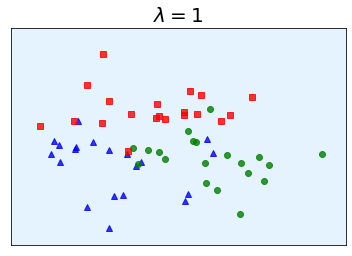

In [6]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis= 0, keepdims= True))
    Z = e_V/e_V.sum(axis = 0)
    return Z
#one hot coding
from scipy  import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), 
                          shape= (C, len(y))).toarray()
    return Y

#cost or loss function
lam = 0.001 # regularization parameter
def cost(Y, Yhat, W1, W2, lam):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1] + lam*(np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3

def mynet(lam):
    #initialize parameters randomly
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))
    
    Y = convert_labels(y, C)
    N = X.shape[1]
    eta = 1 
    for i in range(10000):
        #feed forward
        Z1 = np.dot(W1.T, X) + b1
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)
        
        if i %1000 == 0:
            loss = cost(Y, Yhat, W1, W2, lam)
            print("iter %d, loss: %f"%(i, loss))
        #backpropagation
        E2 = (Yhat - Y)/N
        dW2 = np.dot(A1, E2.T) + lam*W2
        db2 = np.sum(E2, axis= 1, keepdims= True)
        E1 = np.dot(W2, E2)
        E1[Z1<=0] = 0 #gradient of ReLU
        dW1 = np.dot(X, E1.T) + lam*W1
        db1 = np.sum(E1, axis = 1, keepdims= True)
        #gradient descent update
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
        
    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    acc = (100*np.mean(predicted_class == y))
    print('training accuracy: %.2f %%' % acc)
            
    xm = np.arange(-3, 4, 0.025)
    xlen = len(xm)
    ym = np.arange(-4, 4, 0.025)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)

    print(np.ones((1, xx.size)).shape)
    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)

    X0 = np.vstack((xx1, yy1))

    Z1 = np.dot(W1.T, X0) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # predicted class 
    Z = np.argmax(Z2, axis=0)

    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

    kmeans_display(X.T, original_label.T)

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    
    plt.title('$\lambda =$' + str(lam), fontsize = 20)
    fn = 'nnet_reg'+ str(lam) + '.png'
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()


# mynet(0)
# mynet(0.1)
# mynet(0.01)
mynet(0)
mynet(0.001)
mynet(0.01)
mynet(0.1)
mynet(1)